<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/week-Apr.-17/DataDazzlers_Tuning_Hyperparms_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')


Neural Networks

Tuning Hyperparameters

Dataset: AirBNB





In this project we will use the New York City Airbnb Open Data:

https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv

We'll be working with the 'price' variable, and we'll transform it to a classification task.


In [60]:
#Dataframe and numerical library
import pandas as pd 
import numpy as np
from scipy import stats

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from matplotlib import rcParams

#Stats
from scipy import stats

#Machine Learning Model
#Metrics
from sklearn.metrics import mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#Ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Others
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier



#Hyper parameter
from sklearn import neighbors, datasets, model_selection

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K



Prepare the data

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15438,12376365,SERENITY ROOM,45601111,Dlb,Queens,Laurelton,40.66952,-73.74624,Private room,40,2,47,2019-02-15,1.19,5,173
22944,18585546,"Spacious Private 1BR apt,common area in UES/Ha...",21372426,Kyle,Manhattan,East Harlem,40.78974,-73.94250,Shared room,350,3,0,NaN,NaN,1,83
17866,13998049,Cozy Studio blocks from Time Square & the Hudson.,7245466,Steven,Manhattan,Hell's Kitchen,40.76210,-73.99424,Entire home/apt,150,1,2,2017-01-05,0.06,1,0
9419,7224028,Modest and Cute Room in Bushwick Brooklyn!,5998033,Eddie,Brooklyn,Bushwick,40.68929,-73.90484,Private room,36,2,3,2017-07-01,0.06,1,0
3881,2379865,Cozy private room available in a great location,12157737,Dushyant,Brooklyn,Crown Heights,40.67343,-73.96291,Private room,38,3,0,NaN,NaN,1,0


In [62]:
df.shape


(48895, 16)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [64]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [65]:
to_drop = ['id', 'reviews_per_month','name','host_id','last_review','host_name' ]
df = df.drop(to_drop, axis = 1)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [68]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.
# Create a new column 'above_average'
df['above_average'] = (df['price'] >= 152).astype(int)

In [69]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0


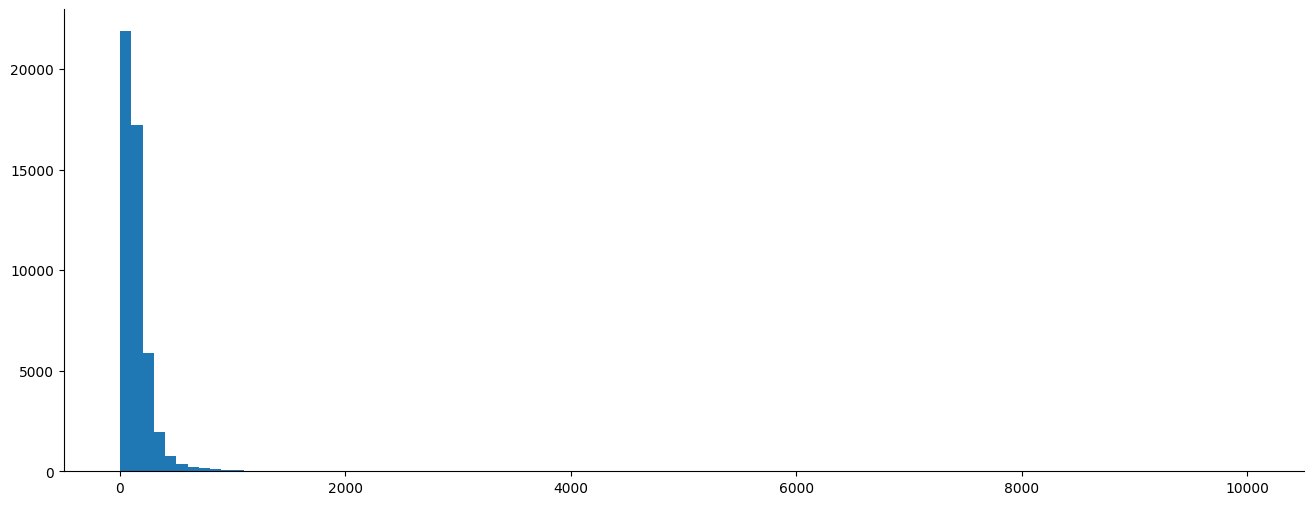

In [70]:
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

In [71]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [72]:
print(min(df['price']))
print(max(df['price']))

0
10000


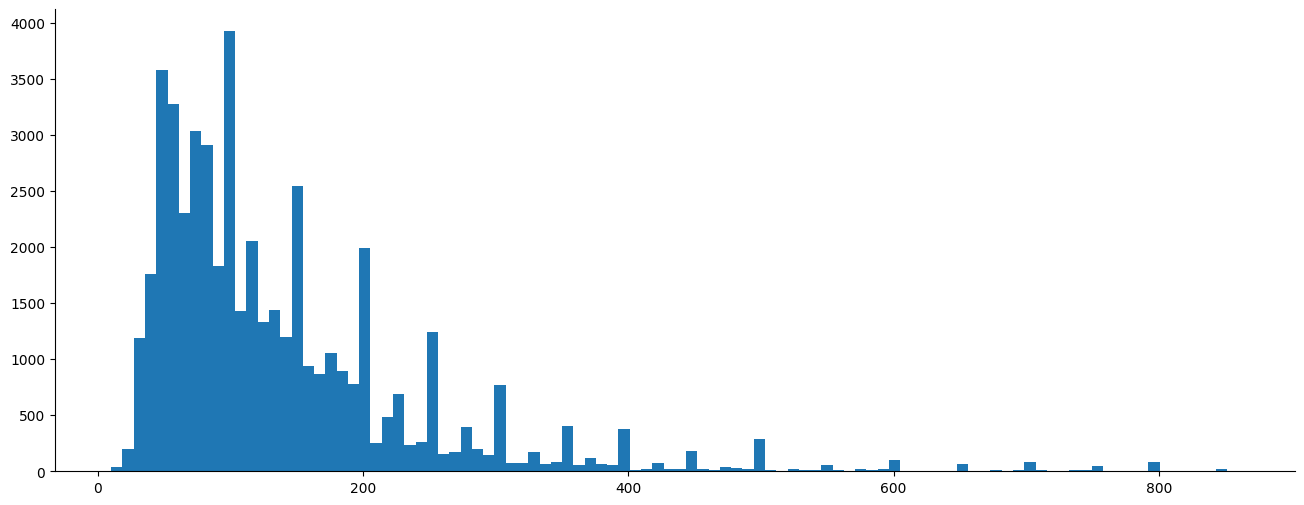

In [73]:
# Calculate Z-values for price
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [74]:
df.shape

(48496, 11)

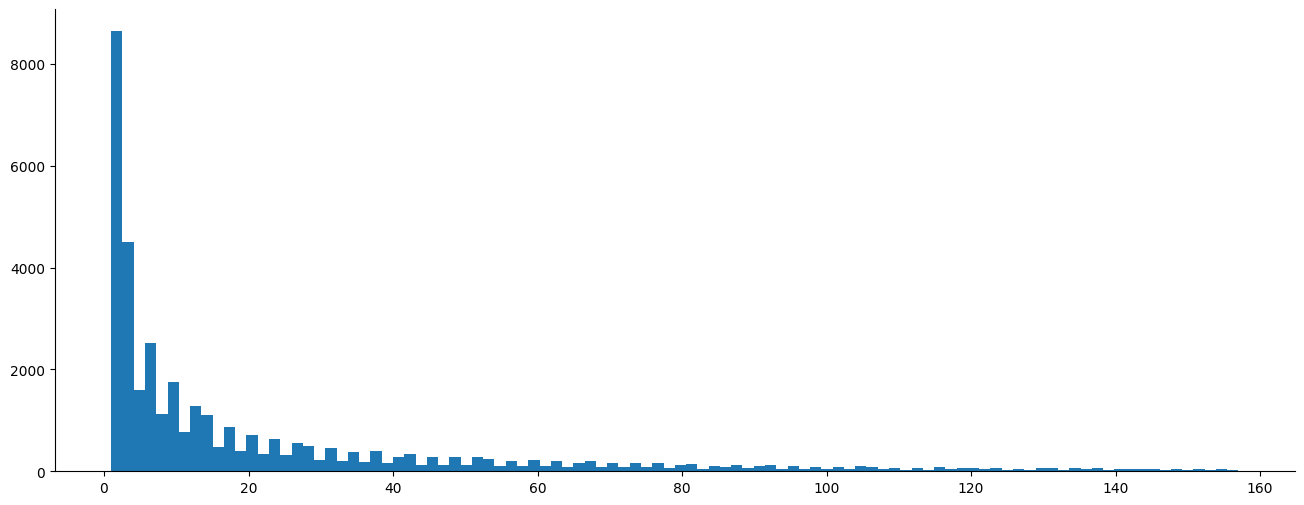

In [75]:
# Calculate Z-values for number of reviews
df['number_of_reviews_z'] = np.abs(stats.zscore(df['number_of_reviews']))

# Filter out outliers
df = df[df['number_of_reviews_z'] <= 3]

# Remove houses listed for $0
df = df[df['number_of_reviews'] != 0]

# Drop the column
df = df.drop('number_of_reviews_z', axis=1)

# Draw a histogram
plt.hist(df['number_of_reviews'], bins=100);

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37434 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             37434 non-null  object 
 1   neighbourhood                   37434 non-null  object 
 2   latitude                        37434 non-null  float64
 3   longitude                       37434 non-null  float64
 4   room_type                       37434 non-null  object 
 5   price                           37434 non-null  int64  
 6   minimum_nights                  37434 non-null  int64  
 7   number_of_reviews               37434 non-null  int64  
 8   calculated_host_listings_count  37434 non-null  int64  
 9   availability_365                37434 non-null  int64  
 10  above_average                   37434 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.4+ MB


In [77]:
# Drop original price column
df = df.drop(['price'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [78]:
df['neighbourhood'].value_counts()

Williamsburg          3051
Bedford-Stuyvesant    3000
Harlem                2126
Bushwick              1882
Hell's Kitchen        1456
                      ... 
Castle Hill              2
New Dorp Beach           2
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [79]:
df.to_csv("neural_network_cleanup.csv")

In [80]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['neighbourhood'] == location]) < threshold:
        return 'Rare'
    return location

In [81]:
df['neighbourhood'] = df['neighbourhood'].apply(
    lambda x: remap_location(data=df, location=x)
)

df.sample(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
44525,Brooklyn,Brighton Beach,40.57541,-73.96028,Private room,2,6,1,50,0
46300,Brooklyn,Bedford-Stuyvesant,40.68366,-73.91920,Entire home/apt,2,1,1,341,1
21847,Staten Island,Rare,40.53871,-74.16966,Entire home/apt,1,136,1,136,1
35848,Manhattan,Kips Bay,40.74197,-73.98012,Entire home/apt,7,2,1,0,0
28249,Brooklyn,Williamsburg,40.71271,-73.94284,Entire home/apt,1,1,1,0,0
25398,Brooklyn,Park Slope,40.67447,-73.97605,Entire home/apt,2,7,1,14,1
16848,Manhattan,Hell's Kitchen,40.76196,-73.99803,Entire home/apt,30,1,121,365,1
4567,Manhattan,Harlem,40.82165,-73.95491,Private room,3,16,1,209,0
16737,Manhattan,Harlem,40.82429,-73.95225,Private room,7,2,1,0,0
37304,Brooklyn,Boerum Hill,40.68612,-73.98988,Entire home/apt,2,9,2,3,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37434 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             37434 non-null  object 
 1   neighbourhood                   37434 non-null  object 
 2   latitude                        37434 non-null  float64
 3   longitude                       37434 non-null  float64
 4   room_type                       37434 non-null  object 
 5   minimum_nights                  37434 non-null  int64  
 6   number_of_reviews               37434 non-null  int64  
 7   calculated_host_listings_count  37434 non-null  int64  
 8   availability_365                37434 non-null  int64  
 9   above_average                   37434 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.1+ MB


In [84]:
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['minimum_nights', 'number_of_reviews','calculated_host_listings_count', 
         'availability_365']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['neighbourhood_group', 'neighbourhood', 'room_type'])
)

In [85]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [86]:
X = df.drop('above_average', axis=1)
y = df['above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Fit
transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['minimum_nights', 'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type'])])

In [88]:
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [89]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [90]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [91]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

##########################################################################

Build Neural Network for AirBNB dataset Classification

Input:

X_train

X_test

y_train

y_test
##########################################################################


In [92]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#
#
# Prepare the data
#df = df.dropna()
#df['is_white_wine'] = [
#    1 if type == 'white' else 0 for typ in df['type']
#]
#df['is_good_wine'] = [
#    1 if quality >= 6 else 0 for quality in df['quality']
#]
#df.drop(['type', 'quality'], axis=1, inplace=True)
#
# Train/test split
#X = df.drop('is_good_wine', axis=1)
#y = df['is_good_wine']
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, 
#    test_size=0.2, random_state=42
#)

# Scaling
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [93]:
# How to optimize the learning rate in tensorflow
import tensorflow as tf
tf.random.set_seed(42)

In [94]:
1e-3 * 10 ** (1 / 30), 1e-3 * 10 ** (100 / 30)


(0.0010797751623277097, 2.1544346900318847)

In [96]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
936/936 [==============================] - 5s 4ms/step - loss: 0.4002 - accuracy: 0.8063 - lr: 0.0010
Epoch 2/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3877 - accuracy: 0.8130 - lr: 0.0011
Epoch 3/100
936/936 [==============================] - 3s 4ms/step - loss: 0.3855 - accuracy: 0.8139 - lr: 0.0012
Epoch 4/100
936/936 [==============================] - 3s 4ms/step - loss: 0.3838 - accuracy: 0.8150 - lr: 0.0013
Epoch 5/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3817 - accuracy: 0.8162 - lr: 0.0014
Epoch 6/100
936/936 [==============================] - 3s 4ms/step - loss: 0.3794 - accuracy: 0.8180 - lr: 0.0015
Epoch 7/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3783 - accuracy: 0.8189 - lr: 0.0016
Epoch 8/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3770 - accuracy: 0.8198 - lr: 0.0017
Epoch 9/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3756 - accu

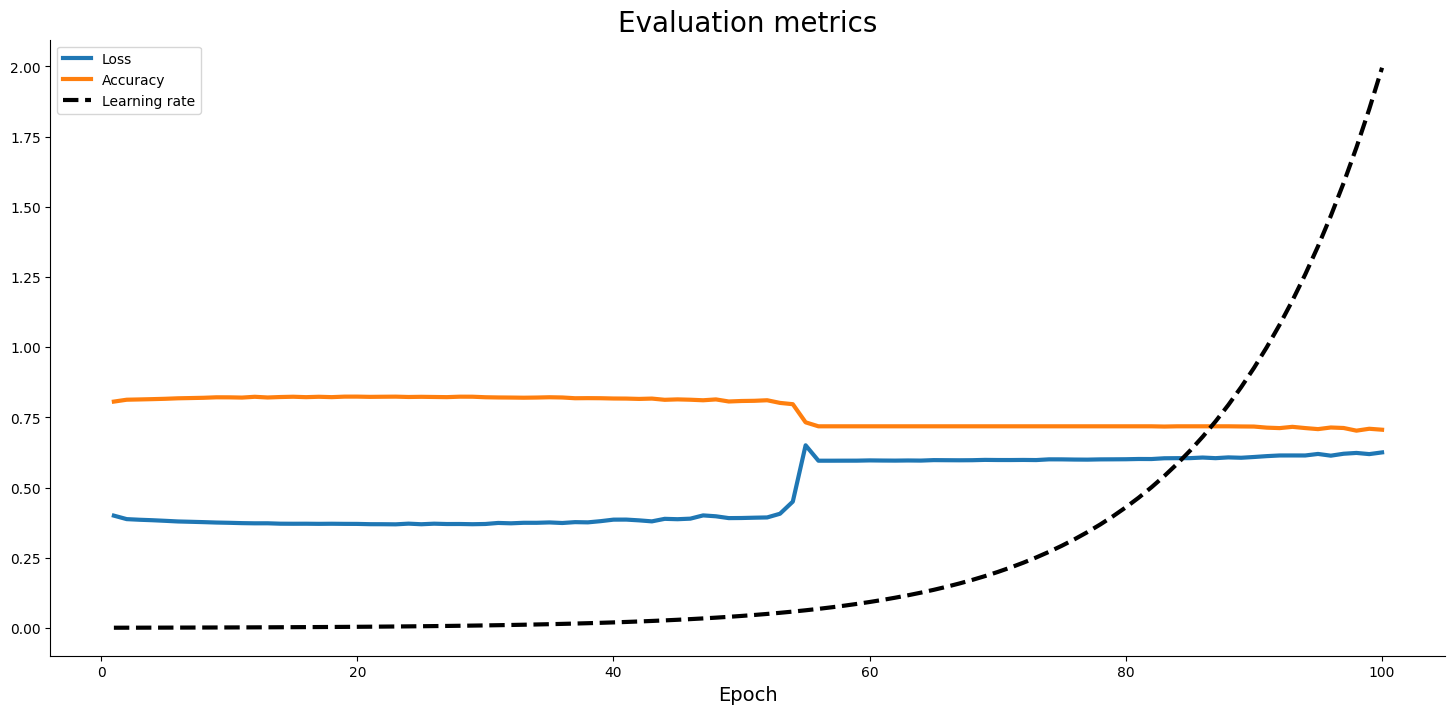

In [97]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

After about 50 epochs 

Loss function increases

Accuracy decreases

Learning rate increasesd

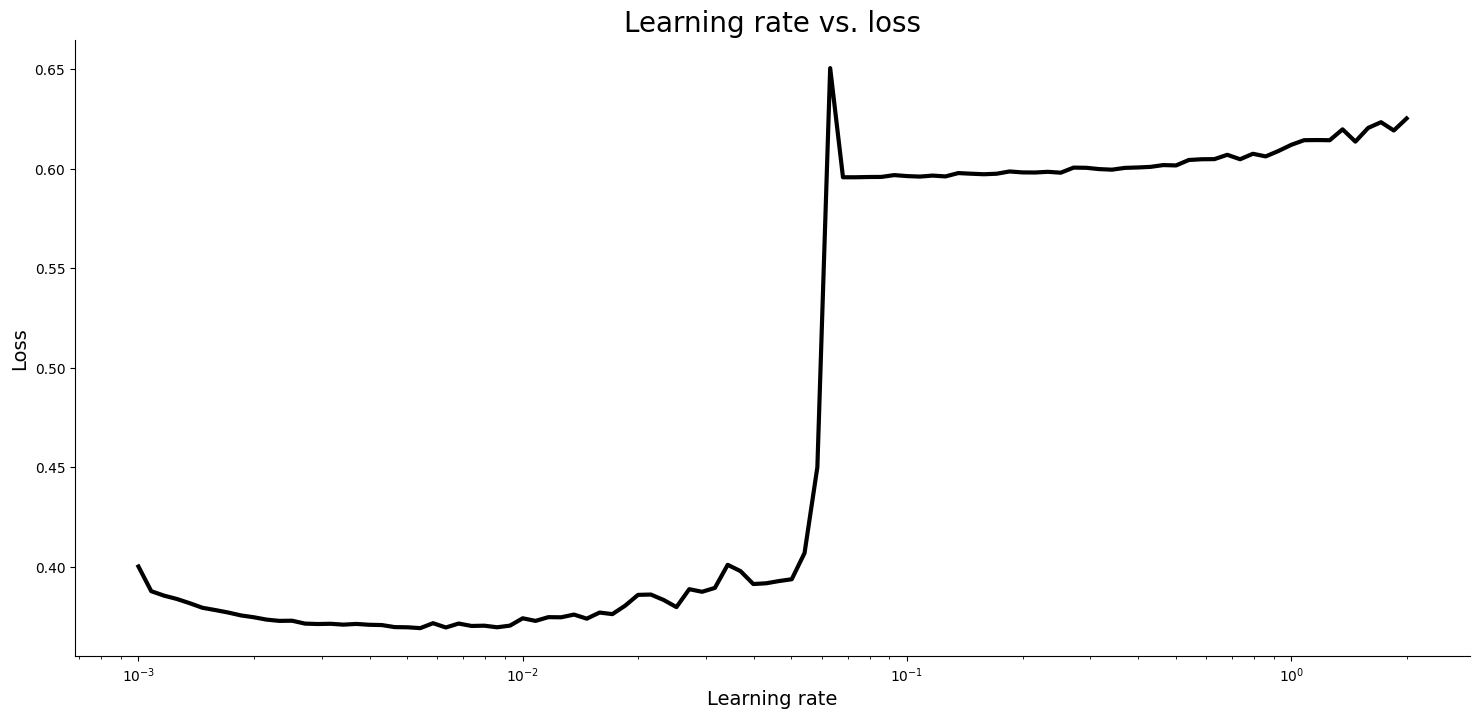

In [98]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [99]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train,
    y_train,
    epochs=100
)

Epoch 1/100
936/936 [==============================] - 4s 4ms/step - loss: 0.4036 - accuracy: 0.8065
Epoch 2/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3926 - accuracy: 0.8115
Epoch 3/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3882 - accuracy: 0.8137
Epoch 4/100
936/936 [==============================] - 3s 4ms/step - loss: 0.3861 - accuracy: 0.8154
Epoch 5/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3839 - accuracy: 0.8149
Epoch 6/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3814 - accuracy: 0.8169
Epoch 7/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3804 - accuracy: 0.8173
Epoch 8/100
936/936 [==============================] - 3s 4ms/step - loss: 0.3778 - accuracy: 0.8186
Epoch 9/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3755 - accuracy: 0.8194
Epoch 10/100
936/936 [==============================] - 4s 4ms/step - loss: 0.3752 - accura

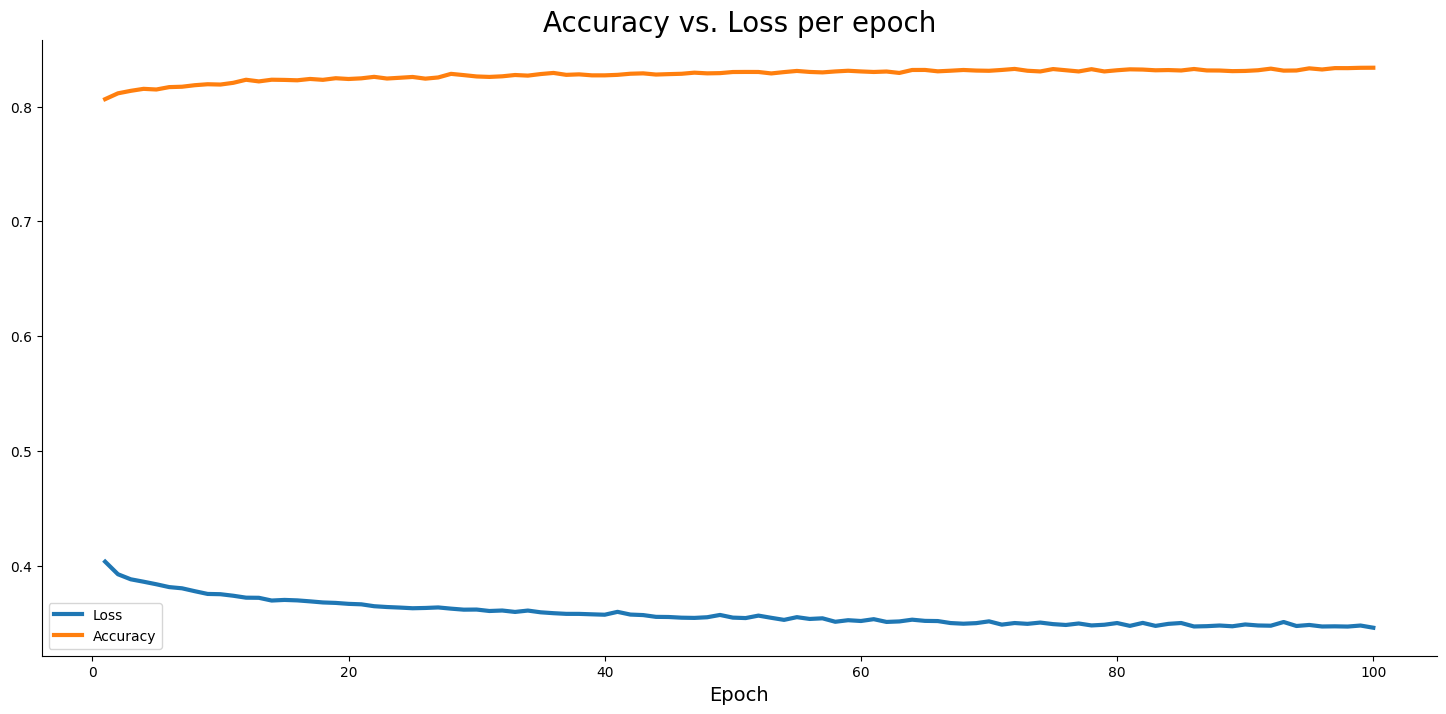

In [100]:
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

41/41 [==============================] - 0s 2ms/step
Accuracy on the test set: 0.80

Confusion matrix:
[[338 144]
 [118 693]]


In [ ]:
# How do you find the Optimal NN Architecture
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tf.random.set_seed(42)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv")
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2486,white,6.7,0.24,0.32,10.3,0.079,37.0,122.0,0.99662,3.02,0.45,8.8,5
2248,white,7.4,0.20,0.29,1.7,0.047,16.0,100.0,0.99243,3.28,0.45,10.6,6
4408,white,5.7,0.29,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5
3283,white,6.6,0.20,0.14,4.4,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,6
3674,white,6.6,0.34,0.20,1.0,0.053,26.0,112.0,0.99336,3.32,0.55,9.1,5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
df = df.dropna()
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
num_layers = 3
min_nodes_per_layer = 64
max_nodes_per_layer = 256
node_step_size = 64

In [ ]:
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 128, 192, 256]

In [ ]:
two_layer_possibilities = [node_options, node_options]

In [ ]:
list(itertools.product(*two_layer_possibilities))

[(64, 64),
 (64, 128),
 (64, 192),
 (64, 256),
 (128, 64),
 (128, 128),
 (128, 192),
 (128, 256),
 (192, 64),
 (192, 128),
 (192, 192),
 (192, 256),
 (256, 64),
 (256, 128),
 (256, 192),
 (256, 256)]

In [ ]:
layer_possibilities = [node_options] * num_layers
layer_node_permutations = list(itertools.product(*layer_possibilities))

In [ ]:
layer_node_permutations

In [ ]:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()

64
64
64

64
64
128



In [ ]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(12,)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [ ]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                832       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [ ]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(12,)
)

In [ ]:
all_models

In [ ]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    # We'll store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want 
        # We're not optimizing this part today
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy')
            ]
        )
        
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [ ]:
optimization_results = optimize(
    models=all_models,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test
)

41/41 [==============================] - 0s 1ms/step
dense128_dense128_dense192 ... 

In [ ]:
optimization_results.sort_values(by='test_accuracy', ascending=False)